# Colab Init

In [1]:
# this mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# enter the foldername in your Drive where you have saved the unzipped
# assignment folder, e.g. 'cs231n/assignments/assignment3/'
FOLDERNAME = 'CS6476-CV/2A Linear image processing'
assert FOLDERNAME is not None, "[!] Enter the foldername."

# now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import numpy as np
import cv2
import os
from skimage.util import random_noise

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2


%matplotlib inline
from matplotlib import pyplot as plt

In [3]:
DRIVE_PATH = "/content/drive/My Drive/Projects"
COURSE_PATH = os.path.join(DRIVE_PATH, FOLDERNAME)
DATA_DIR = os.path.join(COURSE_PATH, "data")

# L2 Filtering

## Load an color image in grayscale


In [4]:
img = cv2.imread(DATA_DIR + '/Saturn.jpg', cv2.IMREAD_GRAYSCALE)

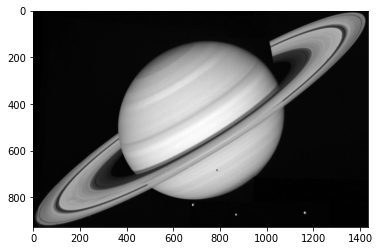

In [5]:
plt.imshow(img, cmap='gray')
plt.show()

## Add noise 

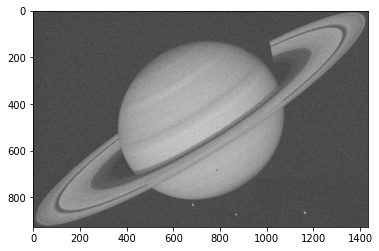

In [6]:
H, W = img.shape 
noise_sigma = 25
noise = np.random.randn(H, W) * 25
noise_img = img + noise
plt.imshow(noise_img, cmap='gray')
plt.show()

## Remove noise with Gaussian Filter

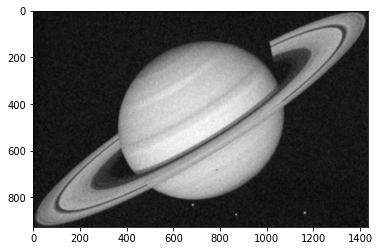

In [7]:
filter_size = 7
filter_sigma = 5
filter = cv2.GaussianBlur(noise_img, (filter_size, filter_size), filter_sigma)
plt.imshow(filter, cmap='gray')
plt.show()

# L3 Linearity and convolution	

## Boundry Issues

### Load Color image

In [8]:
img = cv2.imread(DATA_DIR + '/fall-leaves.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

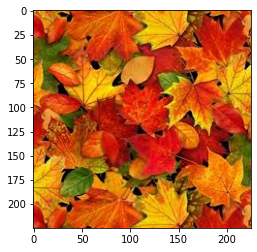

In [9]:
plt.imshow(img)
plt.show()

### Border types

In [10]:
# https://docs.opencv.org/2.4/modules/imgproc/doc/filtering.html#gaussianblur
border_type = [cv2.BORDER_REPLICATE, cv2.BORDER_REFLECT, 
               cv2.BORDER_REFLECT_101, cv2.BORDER_WRAP,
               cv2.BORDER_CONSTANT, cv2.BORDER_DEFAULT]

### Test the borders

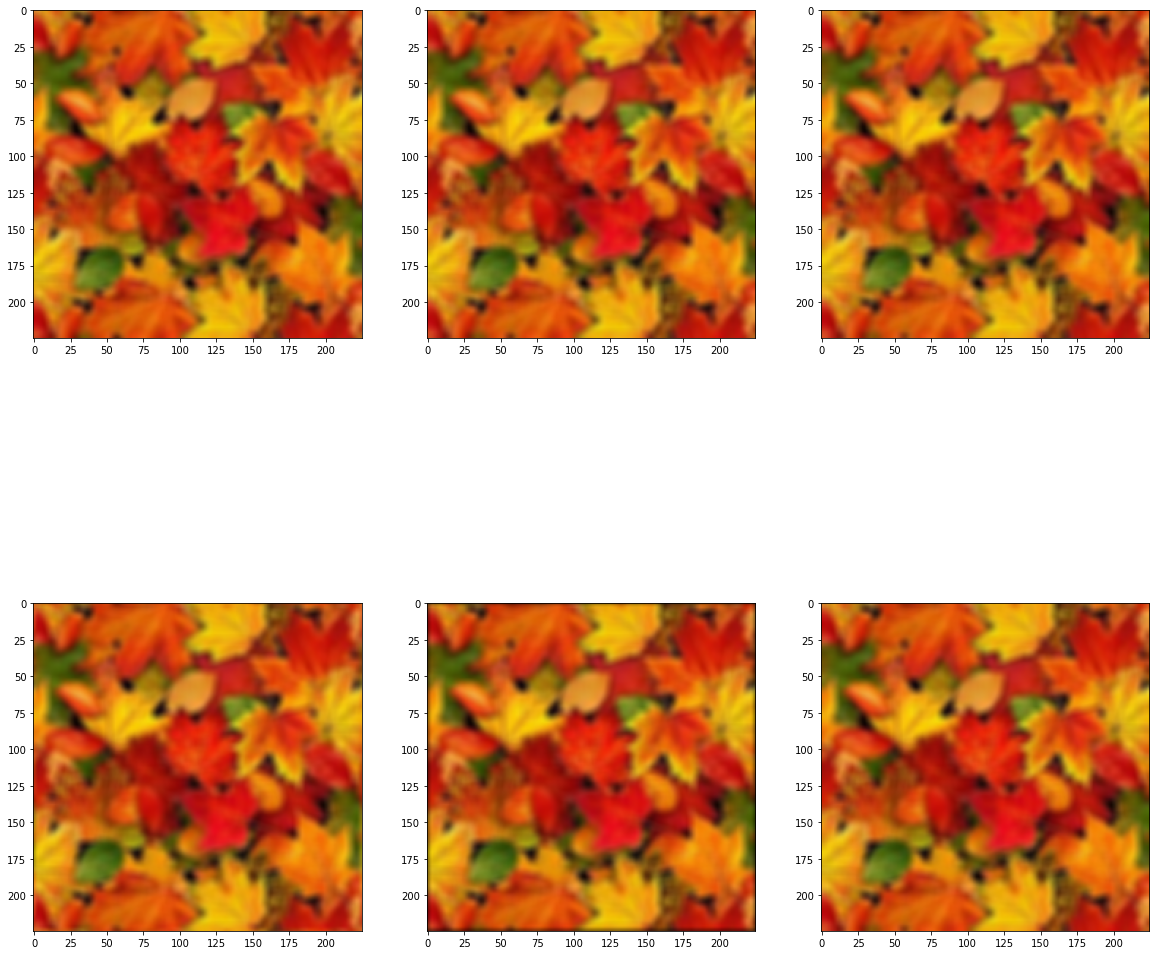

In [11]:


rows = 2
cols = 3
border = 0
f, axarr = plt.subplots(rows,cols, figsize=(20,20))
filter_size = 7
filter_sigma = 3
for i in range(rows):
  for j in range(cols):
    filtered_image = cv2.GaussianBlur(img, (filter_size, filter_size), filter_sigma, borderType=border_type[border])
    axarr[i,j].patch.set_edgecolor('white')  
    axarr[i,j].patch.set_linewidth('10')  
    axarr[i,j].imshow(filtered_image)
    border += 1

plt.show()

## Median Filter

### Load image

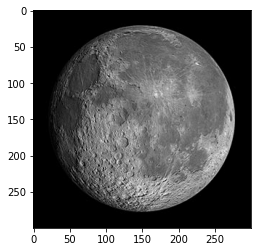

In [12]:
img = cv2.imread(DATA_DIR + '/moon.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.show()

### Add s&p noise

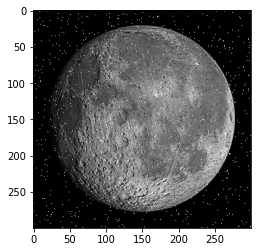

In [13]:
noise_img = random_noise(img, mode='s&p',amount=0.02)
plt.imshow(noise_img, cmap='gray')
plt.show()

### Remove noise with median filter

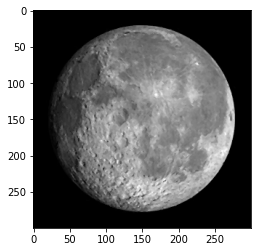

In [14]:
filtered_img = cv2.medianBlur(noise_img.astype('float32'), ksize=3)
plt.imshow(filtered_img, cmap='gray')
plt.show()

# L4 Filters as templates

## Find template 1D

### Create signal and templates

In [15]:
s = np.array([-1, 0, 0, 1, 1, 1, 0, -1, -1, 0, 1, 0, 0, -1], dtype=np.float32)
t1 = np.array([1, 1, 0], dtype=np.float32)
t2 = np.array([0, -1, -1, 0], dtype=np.float32)
t3 = np.array([1, 1, 1, 0, 0], dtype=np.float32)

### Find template 1D function



In [16]:
def find_template_1d(template, signal):
  index = cv2.matchTemplate(template, signal, cv2.TM_CCORR_NORMED)
  print('first index of the template: {}'.format(np.argmax(index)))
  return index

In [17]:
results = find_template_1d(t1, s)
results = find_template_1d(t2, s)
results = find_template_1d(t3, s)

first index of the template: 4
first index of the template: 6
first index of the template: 3


## Find template 2D

### Load image and show

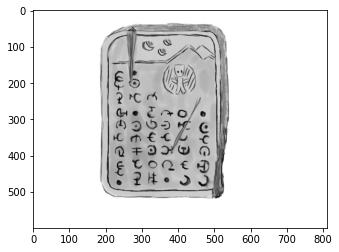

In [18]:
img = cv2.imread(DATA_DIR + '/glyphs.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.show()

### Take a single glyph

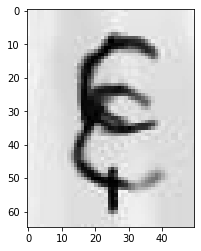

In [19]:
glyph = img[160:225, 210:260]
plt.imshow(glyph, cmap='gray')
plt.show()

### Find template 2D function



In [20]:
def find_template_2d(template, image):
  h, w = template.shape
  res = cv2.matchTemplate(image, template, cv2.TM_CCORR_NORMED)
  min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
  top_left = max_loc
  bottom_right = (top_left[0] + w, top_left[1] + h)
  print('top left of the template: {}'.format(top_left))
  print('bottom right of the template: {}'.format(bottom_right))
  return top_left, bottom_right

In [21]:
top_left, bottom_right = find_template_2d(glyph, img)

top left of the template: (210, 160)
bottom right of the template: (260, 225)


([], <a list of 0 Text major ticklabel objects>)

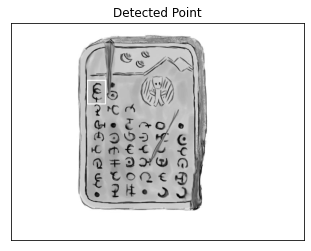

In [22]:
cv2.rectangle(img,top_left, bottom_right, 255, 2)
plt.imshow(img,cmap = 'gray')
plt.title('Detected Point')
plt.xticks([])
plt.yticks([])

# L5 Edge detection: Gradients

## Gradient Direction

### Load image

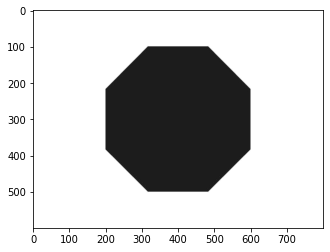

In [36]:
img = cv2.imread(DATA_DIR + '/octagon.jpg', cv2.IMREAD_GRAYSCALE)
img = np.array(img, dtype=np.double) / 255.
plt.imshow(img, cmap='gray')
plt.show()

### Sobel operator

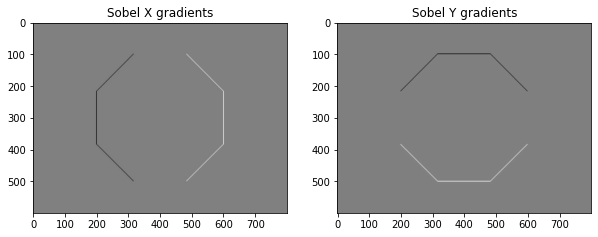

In [42]:
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)

f, axarr = plt.subplots(1, 2, figsize=(10,10))
axarr[0].imshow((sobelx + 4) / 8, cmap='gray')
axarr[0].title.set_text('Sobel X gradients')

axarr[1].imshow((sobely + 4) / 8, cmap='gray')
axarr[1].title.set_text('Sobel Y gradients')

### Magnitude & Direction

In [43]:
magnitude = np.sqrt(sobelx**2 + sobely**2)
direction = np.arctan2(sobely, sobelx)

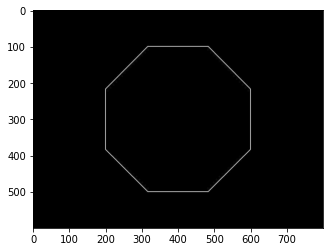

In [47]:
plt.imshow(magnitude, cmap='gray')
plt.show()

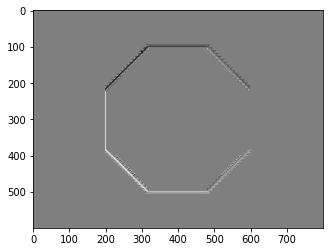

In [89]:
plt.imshow(direction, cmap='gray')
plt.show()

### Gradient by desired direction

In [72]:
def select_gdir(magnitude, direction, mag_min, dir_low, dir_high):
    h, w = magnitude.shape
    image = np.zeros(magnitude.shape)
    for i in range(h):
      for j in range(w):
          if direction[i,j] >= dir_low and direction[i,j] <= dir_high:
            if magnitude[i,j] >= mag_min:
              image[i,j] = magnitude[i,j]
    return image

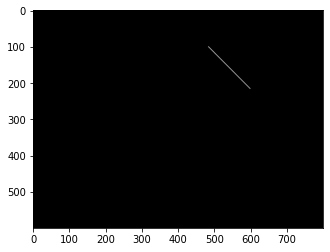

In [87]:
result = select_gdir(magnitude, np.degrees(direction), 1, -60, -30)
plt.imshow(result, cmap='gray')
plt.show()

# L6 Edge detection: 2D operators	